In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from numpy.linalg import eig
warnings.filterwarnings('ignore')


def Pearsoncorrelation(sepal_width,sepal_length):
  xmean,ymean = sepal_width.mean(),sepal_length.mean()
  cov = np.sum((x-xmean) * (y-ymean))/len(df)
  xvar,yvar = sepal_length.var(),sepal_length.var()
  corr = cov/xvar*yvar
  return corr

  
def standardization(df):
  df = df.drop('species',axis=1)
  scaler = StandardScaler()
  df_zscore = pd.DataFrame(scaler.fit_transform(df))
  return df_zscore
  


In [2]:
df = pd.read_csv('iris.csv') 
x = df['sepal_width']
y = df['sepal_length']

corr = Pearsoncorrelation(x,y)       

print('\033[1m' + '\ncorrelation coefficient between sepal_length and sepal_width is:' + '\033[0m') #1. correlation coefficient between sepal_length and sepal_width , calling user defined function by passing two variables
print(corr)
  


correlation coefficient between sepal_length and sepal_width is:
-0.0421511111111111



visualization of correlation between two variables:



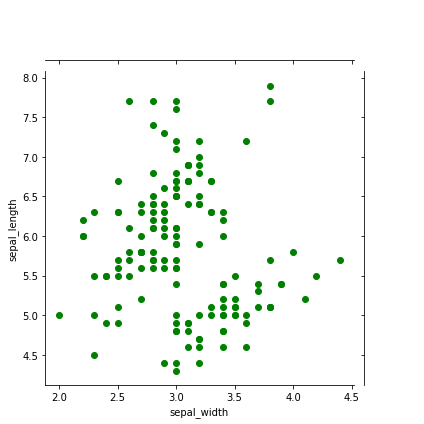

In [3]:
print('\033[1m' +'\nvisualization of correlation between two variables:\n'+'\033[0m')  #2. plot the graphs to visualize the correlation between two variables
grid = sns.JointGrid(x,y)  
plt.show(grid.plot_joint(plt.scatter, color="g"))


visualization of correlation matrix:



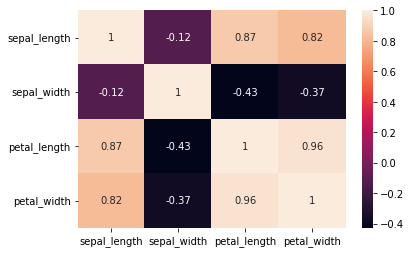

In [7]:
print('\033[1m' +'\nvisualization of correlation matrix:\n'+'\033[0m')      
plt.show(sns.heatmap(df.corr(method='pearson'), annot = True))


In [8]:
df_zscore = standardization(df)
cov_matrix = df_zscore.cov()
print('\033[1m' + '\ncov_matrix' + '\033[0m')       
print(cov_matrix)


cov_matrix
          0         1         2         3
0  1.006711 -0.118359  0.877604  0.823431
1 -0.118359  1.006711 -0.431316 -0.368583
2  0.877604 -0.431316  1.006711  0.969328
3  0.823431 -0.368583  0.969328  1.006711


In [11]:
eigenvalues, eigenvectors = eig(cov_matrix)       

eigen = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen = sorted(eigen, key=lambda k: k[0], reverse=True)  

print('\033[1m' +'\neigenvalues in decreasing order:\n'+'\033[0m')
for i in eigen:
  print(i[0])
 
print('\033[1m' +'\neigenvectors is:\n '+'\033[0m')
for i in eigen:
  print(i[1])


eigenvalues in decreasing order:

2.9380850501999953
0.9201649041624852
0.1477418210449476
0.020853862176463147

eigenvectors is:
 
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[-0.37741762 -0.92329566 -0.02449161 -0.06694199]
[-0.71956635  0.24438178  0.14212637  0.63427274]
[ 0.26128628 -0.12350962 -0.80144925  0.52359713]
